In [1]:
import math
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns

import utils  # Funções auxiliares para a análise

# Oculta warnings do notebook
import warnings
warnings.filterwarnings('ignore')

# Configurações para facilitar a visualização dos dataframes
pd.set_option('display.max_rows', 35)
pd.set_option('display.max_columns', 50)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Carregando dados demográficos e do PHQ
dataset_path = '../data/output/'
dataset_name = 'treated_dataset.csv'

df = pd.read_csv(f"{dataset_path}{dataset_name}")

In [3]:
# Visualizando informações basicas do dataset
print("df.shape: ", {df.shape})

print("\ndf.info():")
print(df.info())

df.sample(5)

df.shape:  {(5334, 33)}

df.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      5334 non-null   int64  
 1   DPQ010                    4827 non-null   float64
 2   DPQ020                    4831 non-null   float64
 3   DPQ030                    4829 non-null   float64
 4   DPQ040                    4831 non-null   float64
 5   DPQ050                    4832 non-null   float64
 6   DPQ060                    4831 non-null   float64
 7   DPQ070                    4832 non-null   float64
 8   DPQ080                    4827 non-null   float64
 9   DPQ090                    4834 non-null   float64
 10  PHQ9                      4836 non-null   float64
 11  PHQ_GRP                   4836 non-null   float64
 12  RIAGENDR                  5334 non-null   int64  
 13  RIDAGEYR                  5

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,PHQ9,PHQ_GRP,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
115,31358,0.00,1.00,0.00,3.00,0.00,0.00,2.00,0.00,0.00,6.00,1.00,2,62,4,4,3.00,0.00,1.00,4.11,5.00,4.52,2.37,0.00,3.38,5.00,1.83,5.45,0.00,4.62,4.94,9.79,51.01
4516,39892,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1,60,4,2,9.00,0.00,1.00,5.00,5.00,4.72,4.53,0.39,0.47,3.99,3.78,5.45,10.00,10.00,10.00,9.66,72.98
1364,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,46,3,2,11.00,270.21,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4649,40140,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,4.00,0.00,2,24,4,5,2.00,207.71,2.00,2.43,0.00,2.66,0.00,0.00,3.37,5.00,3.54,3.05,7.58,10.00,6.42,2.60,46.65
1740,34615,0.00,0.00,0.00,2.00,1.00,0.00,1.00,1.00,0.00,5.00,1.00,2,54,4,5,11.00,"1,676.67",3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

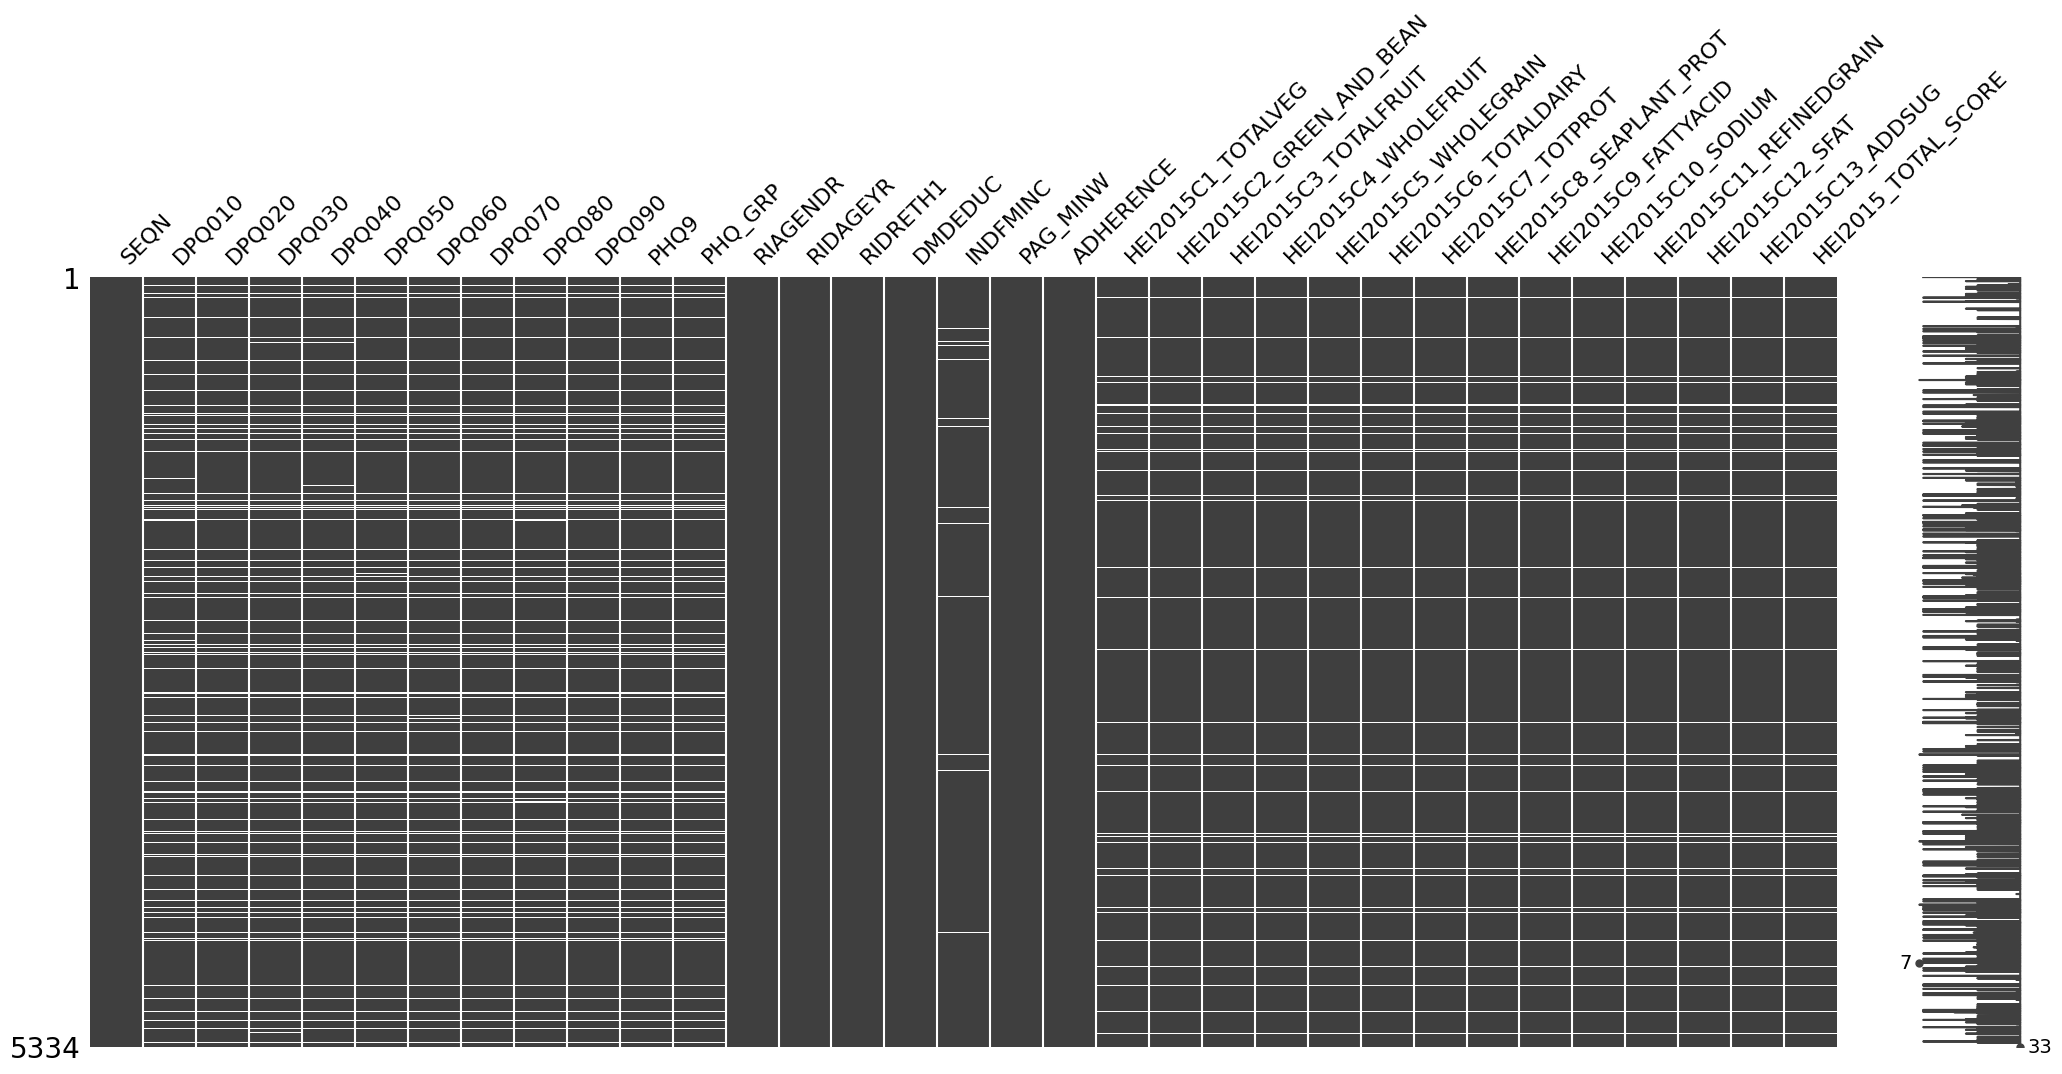

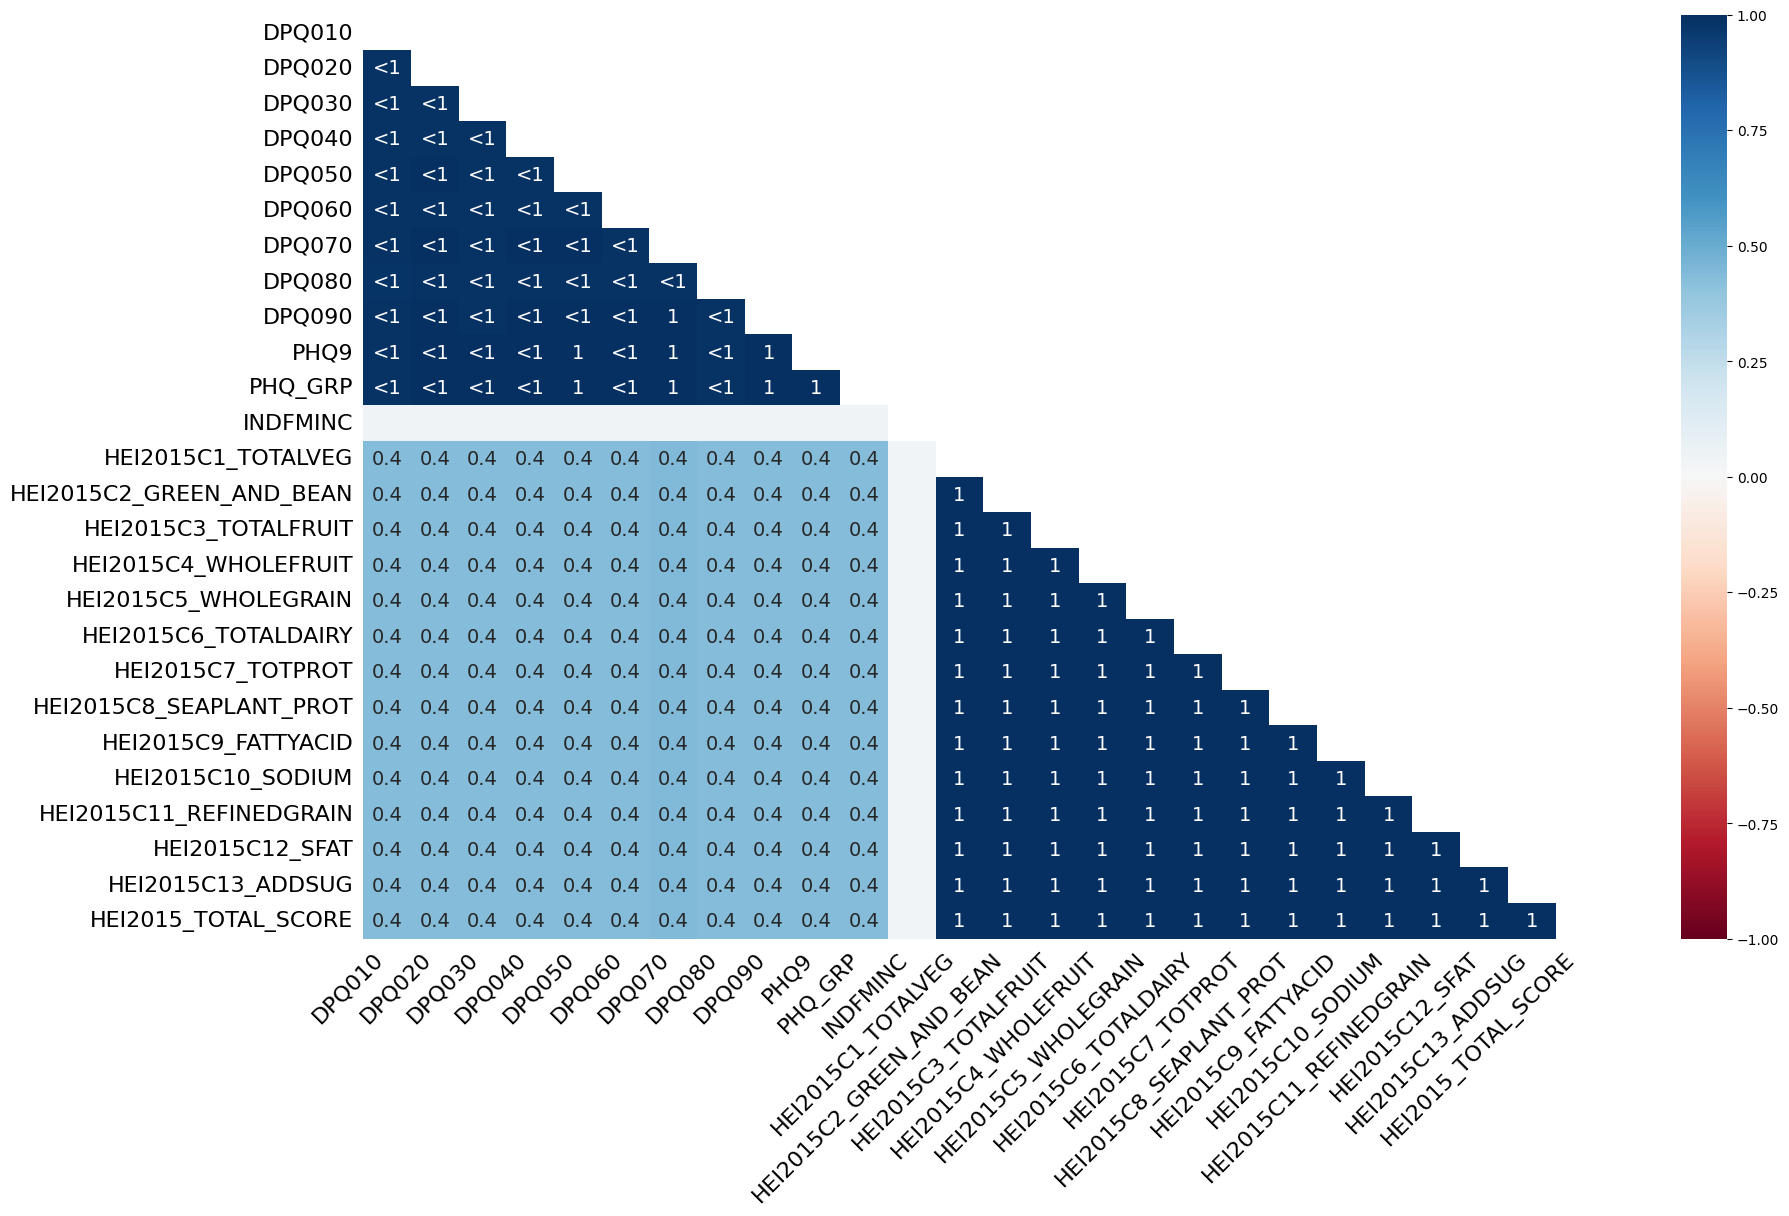

In [4]:
# Verificando ocorrência de valores ausentes
msno.matrix(df)
msno.heatmap(df)

In [5]:
# Separando colunas de acordo com suas origens
demo_cols, phq_cols, hei_cols, pag_cols, phq_score_cols = utils.get_columns_by_source(df)

print(demo_cols)
print(phq_cols)
print(hei_cols)
print(pag_cols)
print(phq_score_cols)

['RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDEDUC', 'INDFMINC']
['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090']
['HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE']
['PAG_MINW', 'ADHERENCE']
['PHQ9', 'PHQ_GRP']


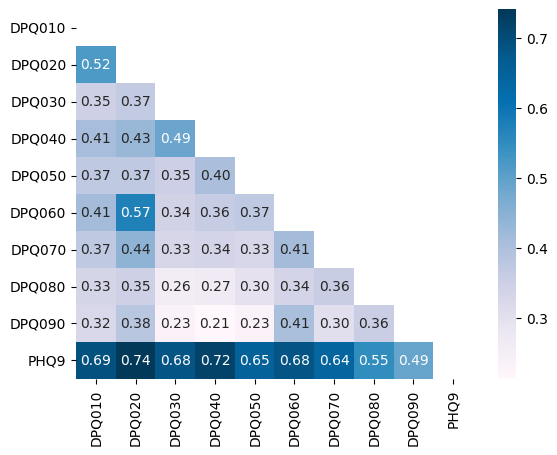

In [6]:
# Correlação do score PHQ-9 com os dados PHQ
utils.plot_phq9_correlation(df, phq_cols)

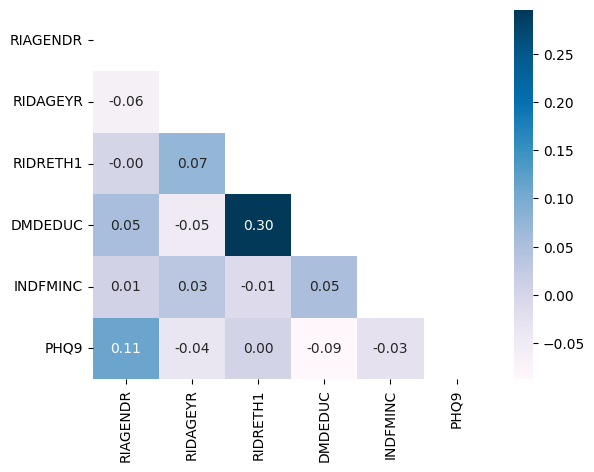

In [7]:
# Correlação do score PHQ-9 com dados demográficos
utils.plot_phq9_correlation(df, demo_cols)

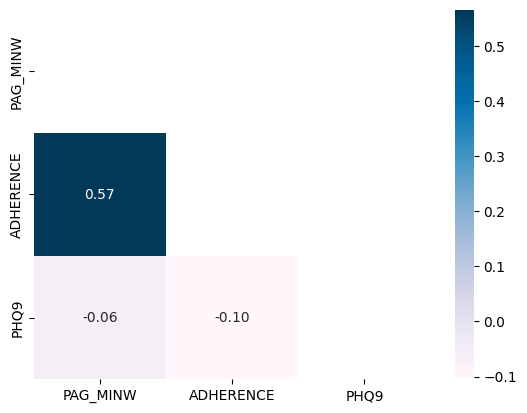

In [8]:
# Correlação do score PHQ-9 com PAG
utils.plot_phq9_correlation(df, pag_cols)

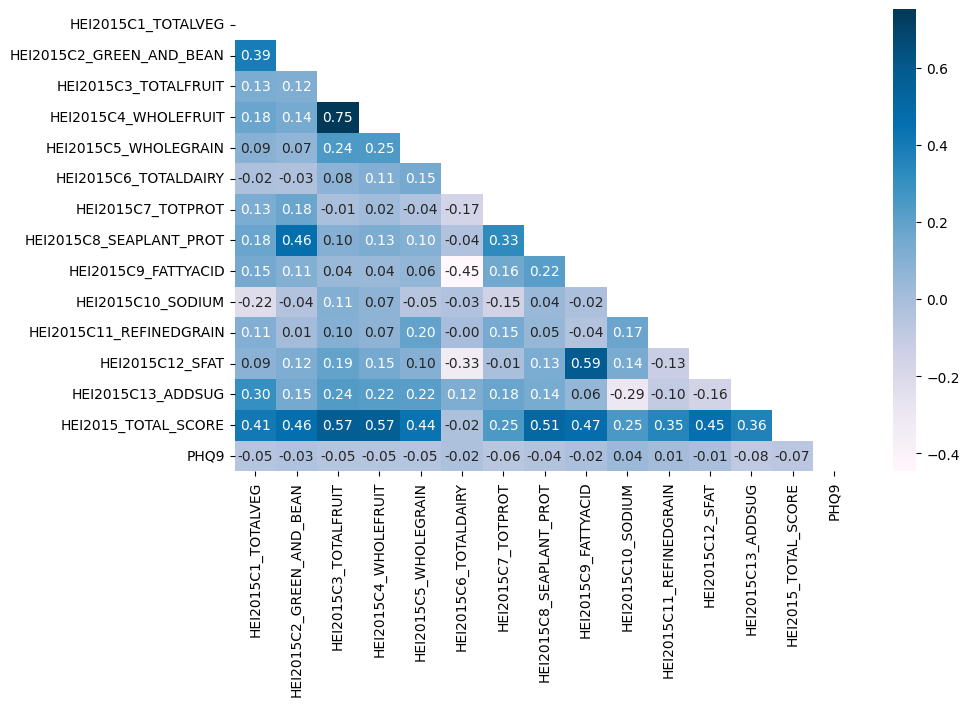

In [9]:
# Correlação do score PHQ-9 com HEI
plt.figure(figsize=(10,6))
utils.plot_phq9_correlation(df, hei_cols)

In [10]:
# Checa colunas com maior correlação com PHQ9
# phq9_corr = utils.get_higher_correlations(df, col='PHQ9')

corr_threshold = 0.3
corr = df.corr().loc['PHQ9']
phq9_corr = pd.concat([corr[corr > corr_threshold], corr[corr < corr_threshold * -1]])

phq9_corr

DPQ010    0.69
DPQ020    0.74
DPQ030    0.68
DPQ040    0.72
DPQ050    0.65
DPQ060    0.68
DPQ070    0.64
DPQ080    0.55
DPQ090    0.49
PHQ9      1.00
PHQ_GRP   0.94
Name: PHQ9, dtype: float64

0.00     1651
1.00      808
2.00      667
3.00      416
4.00      275
5.00      217
6.00      193
7.00      124
9.00       90
8.00       90
10.00      59
12.00      46
11.00      41
13.00      31
14.00      29
15.00      23
17.00      17
16.00      16
19.00      11
18.00       8
21.00       7
23.00       4
22.00       4
24.00       4
26.00       2
20.00       1
27.00       1
25.00       1
Name: PHQ9, dtype: int64


<AxesSubplot: xlabel='PHQ9', ylabel='Count'>

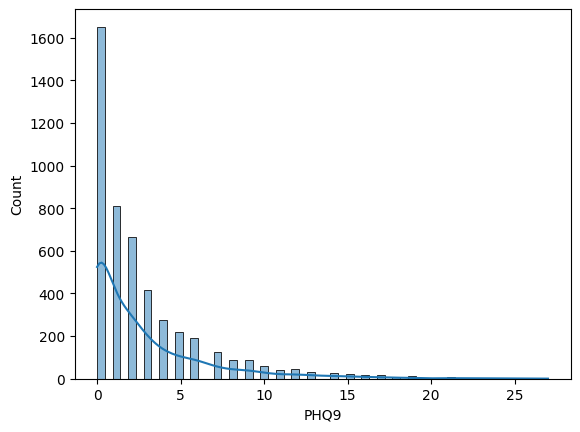

In [11]:
# Analise univariada

print(df['PHQ9'].value_counts())

# Histograma do PHQ-9
sns.histplot(df['PHQ9'], kde=True)

<AxesSubplot: xlabel='PHQ9', ylabel='Count'>

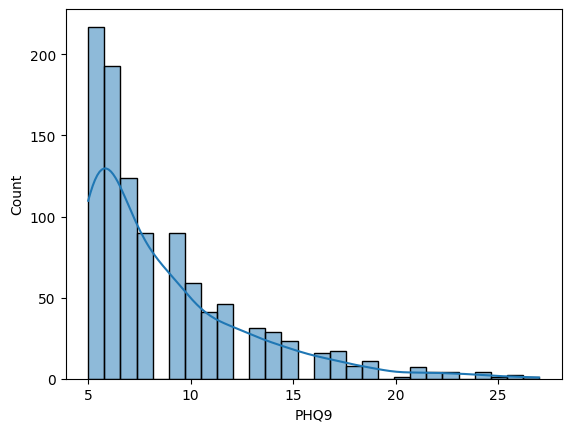

In [15]:
# Histograma do PHQ-9, somente com quem teve sintomas de depressão
sns.histplot(df.query('PHQ_GRP > 0').PHQ9, kde=True)

In [197]:
def plot_for_cols(df, cols, func, kwargs={}, figsize=(20, 12), max_plots_per_row=3, y=None):
    n_cols = len(cols)
    plot_cols = max_plots_per_row
    plot_rows = math.ceil(n_cols / plot_cols)
    
    fig, ax = plt.subplots(plot_rows, plot_cols, figsize=figsize, squeeze=False)
    
    for i, col in enumerate(cols):
        plot_y = i % plot_cols
        plot_x = math.floor(i / plot_cols)
        kwargs["ax"] = ax[plot_x][plot_y]
        
        if y:
            func(data=df, x=col, y=y, **kwargs)
        else:
            func(data=df, x=df[col], **kwargs)

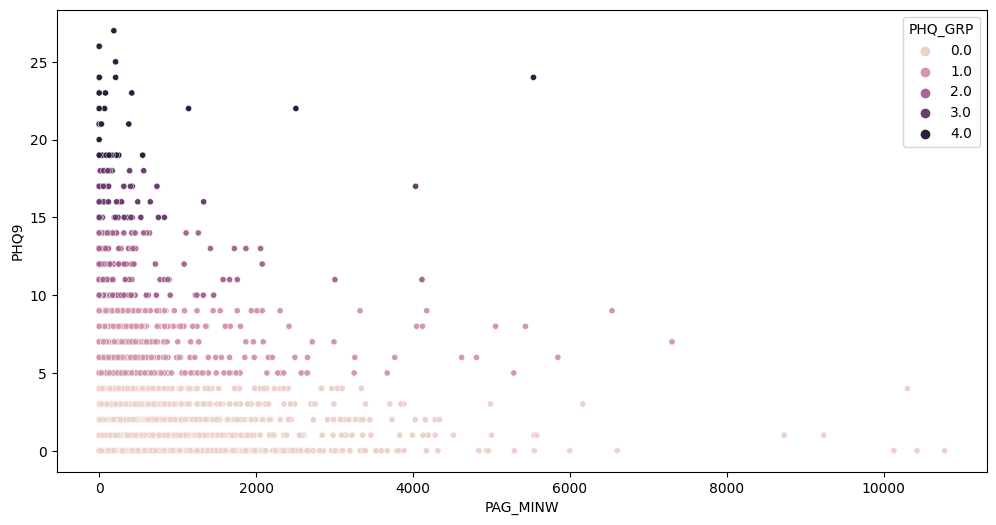

In [209]:
func = sns.scatterplot
kwargs = {
    # "discrete": True,
    "s": 20,
    "hue": "PHQ_GRP"
}
plot_for_cols(df, pag_cols[:1], func=func, kwargs=kwargs, figsize=(12, 6), max_plots_per_row=1, y="PHQ9")

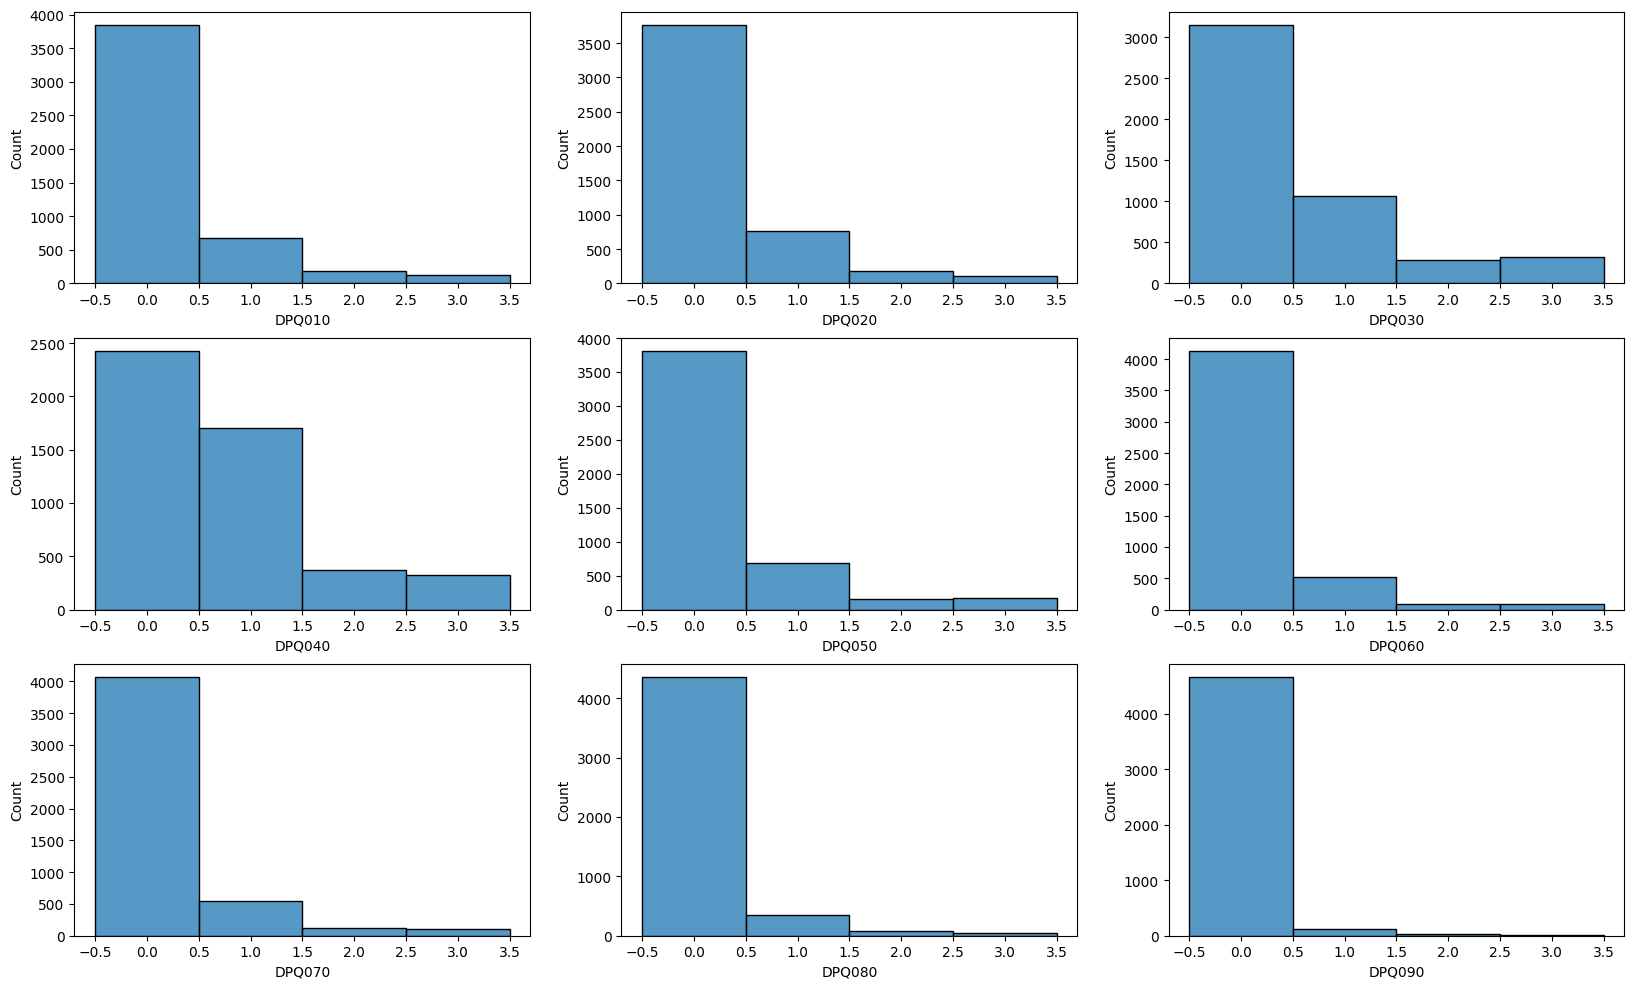

In [199]:
func = sns.histplot
kwargs = {"discrete": True, }
plot_for_cols(df, phq_cols, func=func, kwargs=kwargs)